In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import random
random.seed(42)

In [ ]:
# A2 dataset - digits dataset
data = pd.read_csv('/content/dataset.csv')

df = data
l = df[(df['target'] == 0)].index[3:]
df = df.drop(l)
data = df

data.head()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0.0,2.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,16.0,14.0,8.0,8.0,7.0,0.0,2
1,1,0.0,0.0,2.0,10.0,10.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,16.0,13.0,0.0,0.0,9
2,2,0.0,0.0,4.0,11.0,14.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,15.0,16.0,15.0,4.0,0.0,8
3,3,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,16.0,10.0,0.0,6
4,4,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,9


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,2.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,3.0,16.0,14.0,8.0,8.0,7.0,0.0,2
1,0.0,0.0,2.0,10.0,10.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,16.0,13.0,0.0,0.0,9
2,0.0,0.0,4.0,11.0,14.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,2.0,15.0,16.0,15.0,4.0,0.0,8
3,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,16.0,10.0,0.0,6
4,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,9


#EDA

In [ ]:
# https://seaborn.pydata.org/tutorial/categorical.html

# https://www.kaggle.com/code/subinium/tps-may-categorical-eda

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 764
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  765 non-null    int64  
 1   pixel_0_0   765 non-null    float64
 2   pixel_0_1   765 non-null    float64
 3   pixel_0_2   765 non-null    float64
 4   pixel_0_3   765 non-null    float64
 5   pixel_0_4   765 non-null    float64
 6   pixel_0_5   765 non-null    float64
 7   pixel_0_6   765 non-null    float64
 8   pixel_0_7   765 non-null    float64
 9   pixel_1_0   765 non-null    float64
 10  pixel_1_1   765 non-null    float64
 11  pixel_1_2   765 non-null    float64
 12  pixel_1_3   765 non-null    float64
 13  pixel_1_4   765 non-null    float64
 14  pixel_1_5   765 non-null    float64
 15  pixel_1_6   765 non-null    float64
 16  pixel_1_7   765 non-null    float64
 17  pixel_2_0   765 non-null    float64
 18  pixel_2_1   765 non-null    float64
 19  pixel_2_2   765 non-null    f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


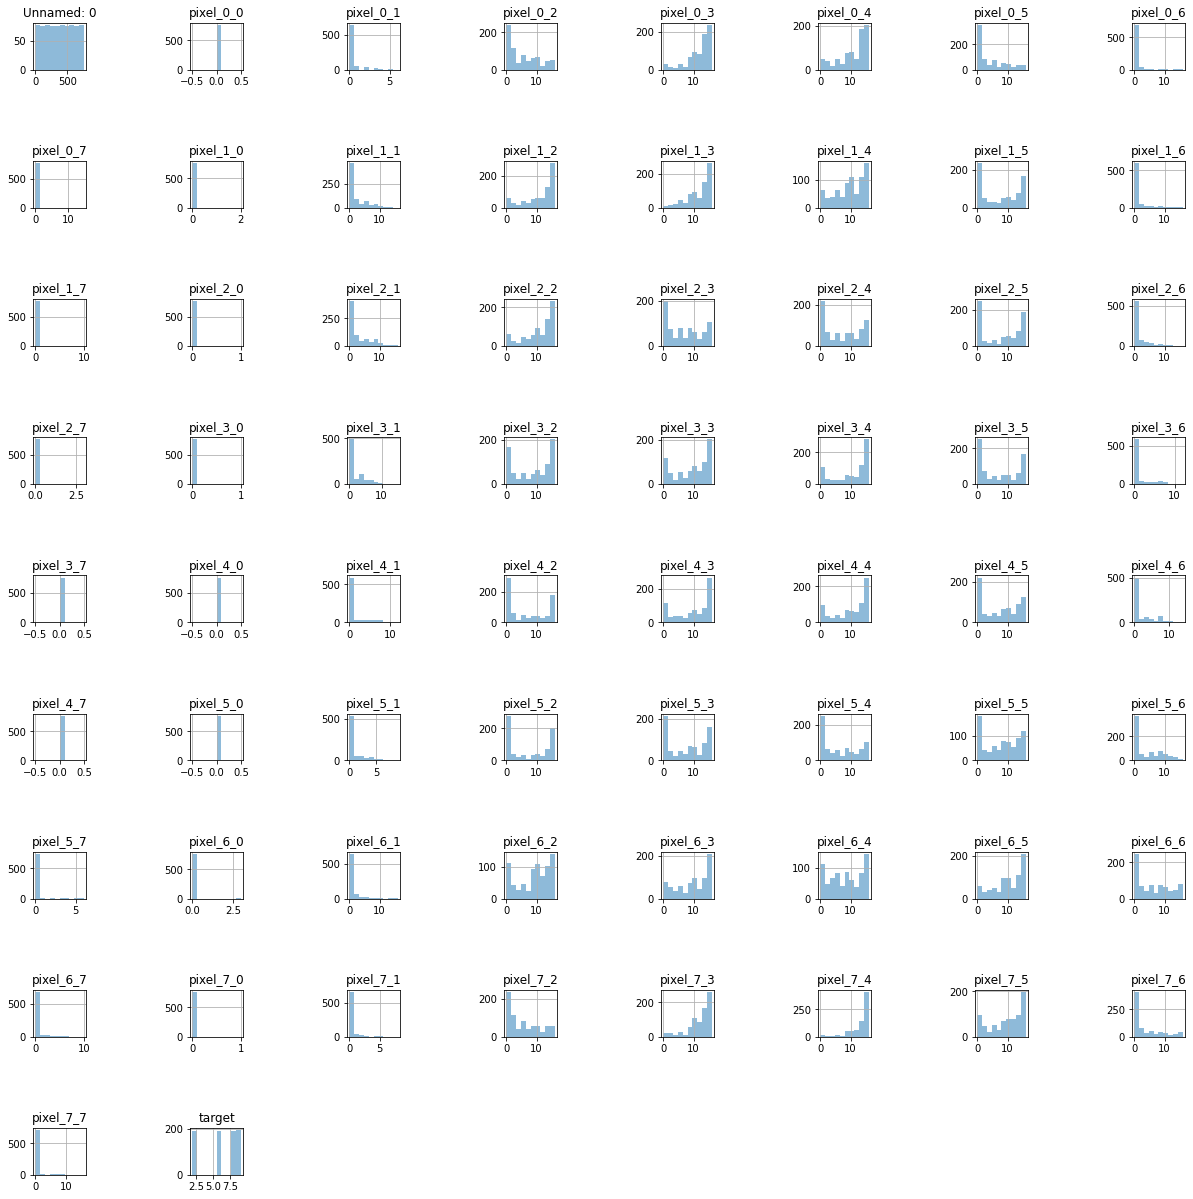

In [ ]:
import matplotlib.pyplot as plt

data.hist( alpha = 0.5,figsize=[20,20], )
plt.tight_layout(pad=150.0) 
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.95,
                    hspace=1.95)       
plt.legend()

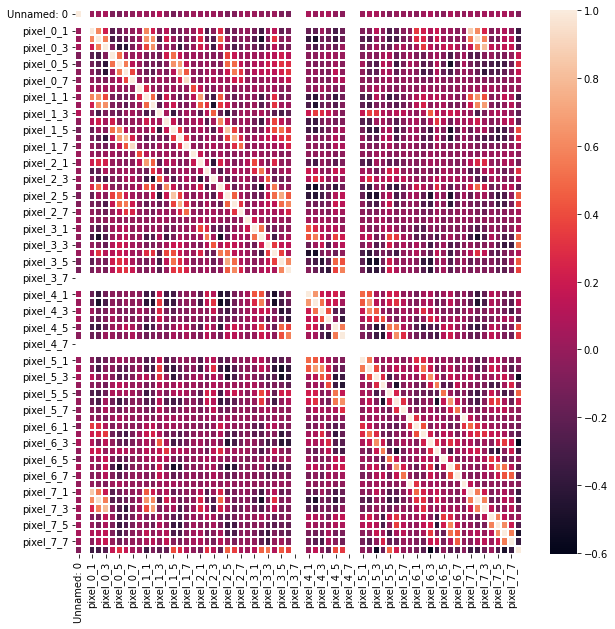

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))         

ax = sns.heatmap(data.corr(), annot=False, ax = ax, linewidths=1)


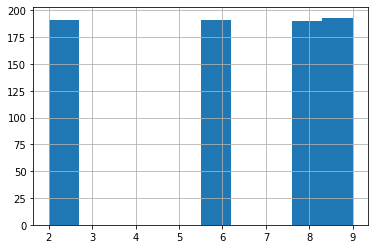

In [ ]:
data = pd.read_csv("dataset.csv")
data['target'].hist()

# Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

accs, bal_accs, f1_micros, f1_macros, f1_weighteds, precs_micro, recs_micro, precs_macro, recs_macro, precs_weighted, recs_weighted = [], [], [], [], [], [], [], [], [], [], []

In [ ]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           2       0.81      0.85      0.83        34
           6       0.86      0.93      0.89        40
           8       0.81      0.79      0.80        38
           9       0.89      0.80      0.85        41

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153



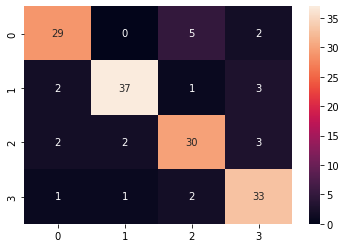

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# DT = LogisticRegression(multi_class='multinomial')

DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

cm = metrics.classification_report(y_pred, y_test)
print(cm)

mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True)


accs.append(metrics.accuracy_score(y_pred, y_test))
bal_accs.append(metrics.balanced_accuracy_score(y_pred, y_test))
f1_micros.append(metrics.f1_score(y_pred, y_test, average='micro'))
f1_macros.append(metrics.f1_score(y_pred, y_test, average="macro"))
f1_weighteds.append(metrics.f1_score(y_pred, y_test, average="weighted"))
precs_micro.append(metrics.precision_score(y_pred, y_test, average="micro"))
recs_micro.append(metrics.recall_score(y_pred, y_test, average="micro"))
precs_macro.append(metrics.precision_score(y_pred, y_test, average="macro"))
recs_macro.append(metrics.recall_score(y_pred, y_test, average="macro"))
precs_weighted.append(metrics.precision_score(y_pred, y_test, average="weighted"))
recs_weighted.append(metrics.recall_score(y_pred, y_test, average="weighted"))

# Anomaly Detection using Dimensionality reduction

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# df = pd.read_csv('/content/dt1_(1).csv')
# df

In [ ]:
# df['target'].value_counts()

9    193
2    191
6    191
8    190
Name: target, dtype: int64

In [ ]:
# updated = (df['target']==1) | (df['target']==7) |(df['target']==3) | (df['target']==5) |(df['target']==4) | (df['target']==0)
# df.loc[updated, 'target'] = -1

In [ ]:
# target_col_name = 'target'
# y = df[target_col_name]
# X = df.drop([target_col_name], axis = 1)
# #X = StandardScaler().fit_transform(df)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

def is_anomaly(data, pca, threshold, power=2):
    pca_data = pca.transform(data)
    restored_data = pca.inverse_transform(pca_data)
    loss = np.sum((data - restored_data) ** power)
    return loss > threshold

In [ ]:
acc_scores = []
max_acc_score = 0
max_acc_score_component = 1
max_acc_score_thresh = 200

for j in range(1,65):
  
  pca = PCA(n_components=j, random_state=42)
  pca.fit_transform(X_train)
  print(f"Starting component {j}")
  
  for i in range(200, 1000,25):
    x = []
    for index, row in X_train.iterrows():
        if is_anomaly([row], pca, float(i)):
            #plt.axvline(row.name, color='r', alpha=0.15)
            x.append(index)
    X_train_new = X_train.drop(x)
    y_train_new = y_train.drop(x)
    DT = DecisionTreeClassifier()
    try:
      DT.fit( X_train_new, y_train_new)
      y_pred = DT.predict( X_test)
      acc_score = metrics.accuracy_score(y_pred,y_test)
      #print(f"Accuracy score for component {j} thresh {i} is {acc_score}")
      if acc_score>max_acc_score:
        max_acc_score = acc_score
        max_acc_score_thresh = i
        max_acc_score_component = j
        cm = metrics.classification_report( y_pred, y_test)
        print(cm)

    except:
      pass
    # acc_scores+=[acc_score]

Starting component 1
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           6       1.00      0.28      0.44       153
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.28       153
   macro avg       0.25      0.07      0.11       153
weighted avg       1.00      0.28      0.44       153

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           6       0.81      0.53      0.64        66
           8       0.41      0.26      0.32        58
           9       0.35      0.45      0.39        29

    accuracy                           0.41       153
   macro avg       0.39      0.31      0.34       153
weighted avg       0.57      0.41      0.47       153

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0


In [ ]:
print(max_acc_score)
print(max_acc_score_component)
print(max_acc_score_thresh)


0.8823529411764706
2
900


In [ ]:
max_acc_score_component

2

In [ ]:
pca = PCA(n_components=max_acc_score_component)
pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.20009992, 0.15934251])

In [ ]:
df_pca = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)

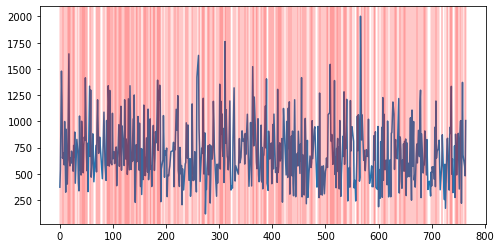

In [ ]:
reconstruction_errors = get_anomaly_scores(X_train, df_restored)
plt.figure(figsize = (8,4))
sns.lineplot(data=reconstruction_errors)
x = []
for index, row in X_train.iterrows():
    if is_anomaly([row], pca, 475):
        plt.axvline(row.name, color='r', alpha=0.15)
        x.append(index)


In [ ]:
len(x)

56

0.6209150326797386
              precision    recall  f1-score   support

           2       0.50      0.86      0.63        21
           6       0.88      0.67      0.76        57
           8       0.49      0.44      0.46        41
           9       0.57      0.62      0.59        34

    accuracy                           0.62       153
   macro avg       0.61      0.65      0.61       153
weighted avg       0.65      0.62      0.62       153



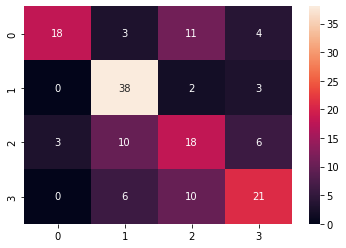

In [ ]:
X_train_new = X_train.drop(x)
y_train_new = y_train.drop(x)

DT = DecisionTreeClassifier()
DT.fit( X_train_new, y_train_new)
y_pred = DT.predict( X_test)

print( metrics.accuracy_score(y_pred,y_test))
cm = metrics.classification_report(y_pred, y_test)
print(cm)

mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True)


accs.append(metrics.accuracy_score(y_pred, y_test))
bal_accs.append(metrics.balanced_accuracy_score(y_pred, y_test))
f1_micros.append(metrics.f1_score(y_pred, y_test, average='micro'))
f1_macros.append(metrics.f1_score(y_pred, y_test, average="macro"))
f1_weighteds.append(metrics.f1_score(y_pred, y_test, average="weighted"))
precs_micro.append(metrics.precision_score(y_pred, y_test, average="micro"))
recs_micro.append(metrics.recall_score(y_pred, y_test, average="micro"))
precs_macro.append(metrics.precision_score(y_pred, y_test, average="macro"))
recs_macro.append(metrics.recall_score(y_pred, y_test, average="macro"))
precs_weighted.append(metrics.precision_score(y_pred, y_test, average="weighted"))
recs_weighted.append(metrics.recall_score(y_pred, y_test, average="weighted"))

Maximum accuracy score of 0.8431372549019608 achieved with 1


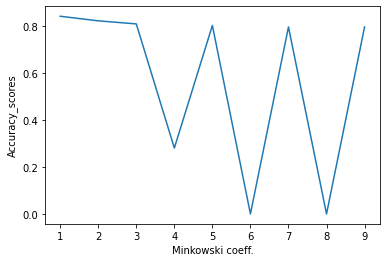

In [ ]:
# minkowski coeff vs accuracy score
acc_scores = []
max_acc_score = 0
max_acc_score_power = 1
pca = PCA(n_components=max_acc_score_component, random_state=0)
pca.fit_transform(X_train)
for i in range(1,10):
  
  x = []
  for index, row in X_train.iterrows():
      if is_anomaly([row], pca, max_acc_score_thresh, i):
          #plt.axvline(row.name, color='r', alpha=0.15)
          x.append(index)
  X_train_new = X_train.drop(x)
  y_train_new = y_train.drop(x)
  DT = DecisionTreeClassifier()
  try:
    DT.fit( X_train_new, y_train_new)
    y_pred = DT.predict( X_test)
    acc_score = metrics.accuracy_score(y_pred,y_test)
    if acc_score>max_acc_score:
      max_acc_score = acc_score
      max_acc_score_power = i
    acc_scores+=[acc_score]
  except:
    acc_scores+=[0]
    pass

print(f"Maximum accuracy score of {max_acc_score} achieved with {max_acc_score_power}")
plt.plot([float(i) for i in range(1,10)], acc_scores, )
plt.xlabel("Minkowski coeff.")
plt.ylabel("Accuracy_scores")
plt.show()

In [ ]:
# plt.figure(figsize=(16,4))
# sns.pairplot(data=df, hue='variety')

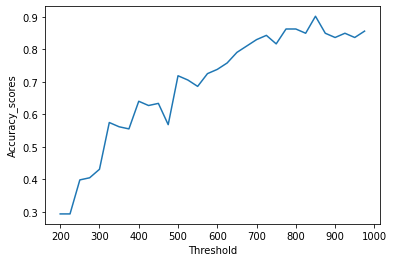

In [ ]:
# accuracy scores vs threshold plot for 4 components
acc_scores = []
max_acc_score = 0
max_acc_score_thresh = 200 
for i in range(200, 1000,25):
  x = []
  for index, row in X_train.iterrows():
      if is_anomaly([row], pca, float(i)):
          #plt.axvline(row.name, color='r', alpha=0.15)
          x.append(index)
  X_train_new = X_train.drop(x)
  y_train_new = y_train.drop(x)
  DT = DecisionTreeClassifier()
  DT.fit( X_train_new, y_train_new)
  y_pred = DT.predict( X_test)
  acc_score = metrics.accuracy_score(y_pred,y_test)
  if acc_score>max_acc_score:
    max_acc_score = acc_score
    max_acc_score_thresh = i
  acc_scores+=[acc_score]

plt.plot([float(i) for i in range(200, 1000,25)], acc_scores, )
plt.xlabel("Threshold")
plt.ylabel("Accuracy_scores")
plt.show()

Maximum accuracy score of 0.8888888888888888 achieved with 3


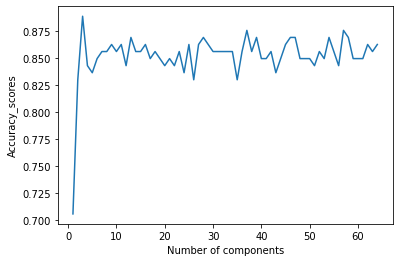

In [ ]:
# number of components vs accuracy score

acc_scores = []
max_acc_score = 0
max_acc_score_component = 1
for i in range(1,65):
  
  pca = PCA(n_components=i, random_state=0)
  pca.fit_transform(X_train)

  x = []
  for index, row in X_train.iterrows():
      if is_anomaly([row], pca, 500):
          #plt.axvline(row.name, color='r', alpha=0.15)
          x.append(index)
  X_train_new = X_train.drop(x)
  y_train_new = y_train.drop(x)
  DT = DecisionTreeClassifier()
  DT.fit( X_train_new, y_train_new)
  y_pred = DT.predict( X_test)
  acc_score = metrics.accuracy_score(y_pred,y_test)
  if acc_score>max_acc_score:
    max_acc_score = acc_score
    max_acc_score_component = i
  acc_scores+=[acc_score]

print(f"Maximum accuracy score of {max_acc_score} achieved with {max_acc_score_component}")
plt.plot([float(i) for i in range(1,65)], acc_scores, )
plt.xlabel("Number of components")
plt.ylabel("Accuracy_scores")
plt.show()

# Clustering based Anomaly Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

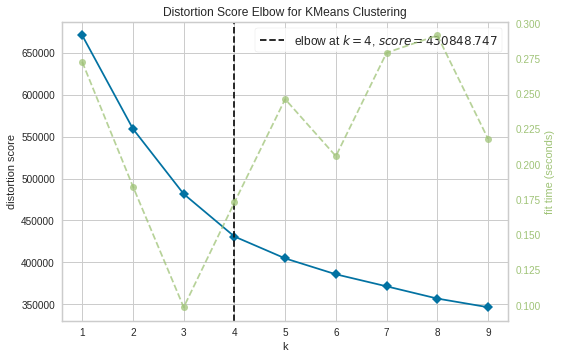

In [ ]:
model = KMeans()
# Use Elbow method to calculate the optimal number of clusters. 
visualizer = KElbowVisualizer(model, k=(1,10), random_state=42)

visualizer.fit(X_train.values)
visualizer.poof() 

In [ ]:
# Fit the models using Number of clusters found. 
N_CLUSTERS = 4
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42) 
kmeans.fit(X_train.values)
centroids = kmeans.cluster_centers_

In [ ]:
# Get the distance of each sample from the closest centroid
X_dist = kmeans.transform(X_train)
X_train['sqdist'] = X_dist.min(axis=1).round(3)
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,sqdist
336,0.0,0.0,0.0,8.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,16.0,11.0,0.0,23.593
688,0.0,0.0,12.0,15.0,13.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,13.0,12.0,15.0,6.0,0.0,28.019
290,0.0,0.0,2.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,13.0,1.0,0.0,0.0,27.681
687,0.0,0.0,6.0,15.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,14.0,13.0,2.0,0.0,0.0,24.327
90,0.0,0.0,0.0,1.0,7.0,14.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,12.0,0.0,0.0,39.087


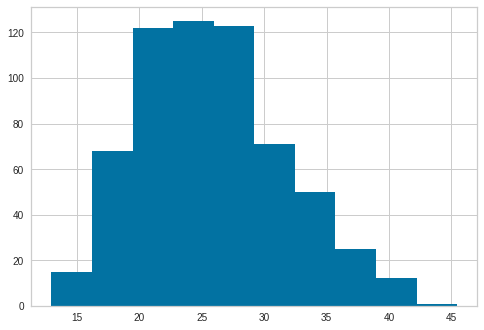

In [ ]:
# Plot the distance to find the range of outliers distance. 
hist = X_train['sqdist'].hist()

In [ ]:
# Select the top outliers according to the histogram
# outliers_idx = list(X_train.sort_values('sqdist', ascending=False).head(10).index)
outliers_idx = list(X_train[X_train['sqdist'] > 42].index)
X_train = X_train.drop(columns=['sqdist'])

In [ ]:
# After clustering datasets
X_train_cluster = X_train[~X_train.index.isin(outliers_idx)]
y_train_cluster = y_train[~y_train.index.isin(outliers_idx)]

              precision    recall  f1-score   support

           2       0.81      0.85      0.83        34
           6       0.86      0.93      0.89        40
           8       0.81      0.79      0.80        38
           9       0.89      0.80      0.85        41

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153



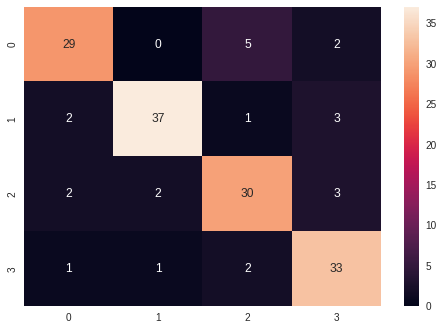

In [ ]:
# Decision Tree with new data
DT = DecisionTreeClassifier(random_state=42)
# DT = LogisticRegression(multi_class='multinomial')

DT.fit(X_train_cluster, y_train_cluster)
y_pred = DT.predict(X_test)

cm = metrics.classification_report(y_pred, y_test)
print(cm)

mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True)


accs.append(metrics.accuracy_score(y_pred, y_test))
bal_accs.append(metrics.balanced_accuracy_score(y_pred, y_test))
f1_micros.append(metrics.f1_score(y_pred, y_test, average='micro'))
f1_macros.append(metrics.f1_score(y_pred, y_test, average="macro"))
f1_weighteds.append(metrics.f1_score(y_pred, y_test, average="weighted"))
precs_micro.append(metrics.precision_score(y_pred, y_test, average="micro"))
recs_micro.append(metrics.recall_score(y_pred, y_test, average="micro"))
precs_macro.append(metrics.precision_score(y_pred, y_test, average="macro"))
recs_macro.append(metrics.recall_score(y_pred, y_test, average="macro"))
precs_weighted.append(metrics.precision_score(y_pred, y_test, average="weighted"))
recs_weighted.append(metrics.recall_score(y_pred, y_test, average="weighted"))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.000s...
[t-SNE] Computed neighbors for 616 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 13.630920
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.126892
[t-SNE] KL divergence after 300 iterations: 0.654746


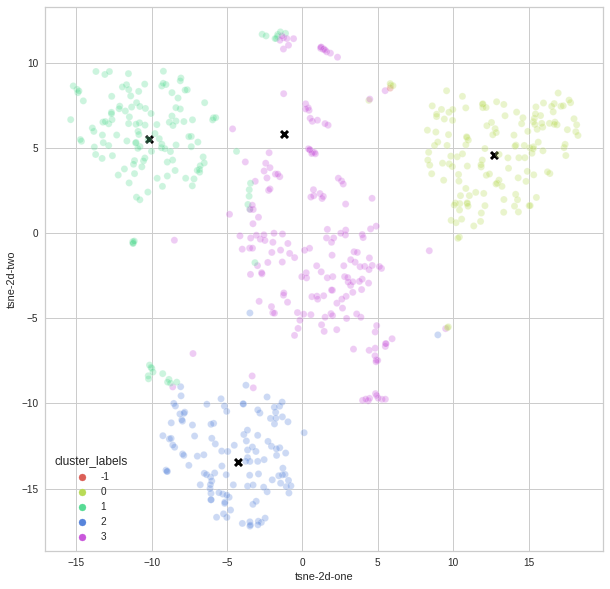

In [ ]:
# Plot the clusters and the outliers
temp = X_train.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmeans.predict(X_train)

data["tsne-2d-one"] = temp[:len(X_train), 0]
data["tsne-2d-two"] = temp[:len(X_train), 1]
data['cluster_labels'] = cluster_labels

data.loc[data.index.isin(outliers_idx), 'cluster_labels'] = -1
tsne_centroids = temp[len(X_train):, :]

plt.figure(figsize=(10,10))
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS+1),
    data=data,
    legend="full",
    alpha=0.3
)

In [ ]:
# SSE in Kmeans
kmeans.inertia_

430846.2725610399

# Classification

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

data = pd.read_csv("dataset.csv")

Y = data['target']
X = data.drop(['Unnamed: 0', 'target'], axis=1)

In [ ]:
# Decision Tree without removing outliers

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DT = DecisionTreeClassifier(random_state=42)

DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))
cm = metrics.classification_report( y_pred, Y_test)
print(cm)

0.8431372549019608
              precision    recall  f1-score   support

           2       0.81      0.85      0.83        34
           6       0.86      0.93      0.89        40
           8       0.81      0.79      0.80        38
           9       0.89      0.80      0.85        41

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153



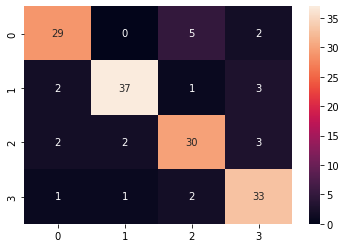

In [ ]:
mat = metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(mat, annot=True)

accs, bal_accs, f1_micros, f1_macros, f1_weighteds, precs_micro, recs_micro, precs_macro, recs_macro, precs_weighted, recs_weighted = [], [], [], [], [], [], [], [], [], [], []

accs.append(metrics.accuracy_score(y_pred, Y_test))
bal_accs.append(metrics.balanced_accuracy_score(y_pred, Y_test))
f1_micros.append(metrics.f1_score(y_pred, Y_test, average='micro'))
f1_macros.append(metrics.f1_score(y_pred, Y_test, average="macro"))
f1_weighteds.append(metrics.f1_score(y_pred, Y_test, average="weighted"))
precs_micro.append(metrics.precision_score(y_pred, Y_test, average="micro"))
recs_micro.append(metrics.recall_score(y_pred, Y_test, average="micro"))
precs_macro.append(metrics.precision_score(y_pred, Y_test, average="macro"))
recs_macro.append(metrics.recall_score(y_pred, Y_test, average="macro"))
precs_weighted.append(metrics.precision_score(y_pred, Y_test, average="weighted"))
recs_weighted.append(metrics.recall_score(y_pred, Y_test, average="weighted"))

In [ ]:
# remove outliers

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = OneClassSVM(nu=0.01) 
model.fit(X_train)

yhat = model.predict(X)


anomaly_df = pd.DataFrame(yhat)
# Y_train = pd.DataFrame(Y_train)

new_data = pd.concat([X, anomaly_df, Y], axis=1)
new_data.rename(columns = {0: 'anomaly'}, inplace=True)
print("Shape before removing anomalies:", new_data.shape)

no_anomaly_data = new_data[new_data.anomaly != -1]
print("Shape after removing anomalies:", no_anomaly_data.shape)

Shape before removing anomalies: (765, 66)
Shape after removing anomalies: (735, 66)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Y = no_anomaly_data['target']
X = no_anomaly_data.drop(['anomaly', 'target'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

DT = DecisionTreeClassifier(random_state=42)

DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))
cm = metrics.classification_report( y_pred, Y_test)
print(cm)

0.9251700680272109
              precision    recall  f1-score   support

           2       0.93      0.93      0.93        44
           6       0.97      0.97      0.97        34
           8       0.86      0.94      0.90        32
           9       0.94      0.86      0.90        37

    accuracy                           0.93       147
   macro avg       0.93      0.93      0.92       147
weighted avg       0.93      0.93      0.93       147



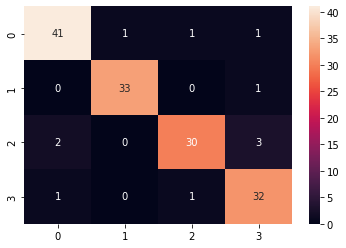

In [ ]:
mat = metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(mat, annot=True)

accs.append(metrics.accuracy_score(y_pred, Y_test))
bal_accs.append(metrics.balanced_accuracy_score(y_pred, Y_test))
f1_micros.append(metrics.f1_score(y_pred, Y_test, average='micro'))
f1_macros.append(metrics.f1_score(y_pred, Y_test, average="macro"))
f1_weighteds.append(metrics.f1_score(y_pred, Y_test, average="weighted"))
precs_micro.append(metrics.precision_score(y_pred, Y_test, average="micro"))
recs_micro.append(metrics.recall_score(y_pred, Y_test, average="micro"))
precs_macro.append(metrics.precision_score(y_pred, Y_test, average="macro"))
recs_macro.append(metrics.recall_score(y_pred, Y_test, average="macro"))
precs_weighted.append(metrics.precision_score(y_pred, Y_test, average="weighted"))
recs_weighted.append(metrics.recall_score(y_pred, Y_test, average="weighted"))

# Evaluations



Accuracy



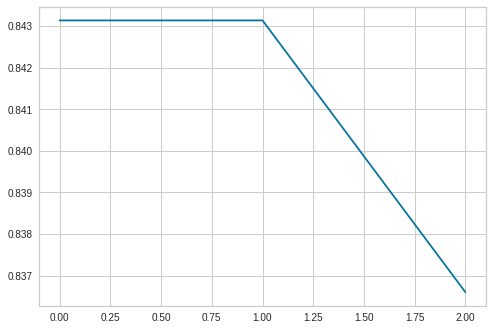



Balenced Accuracy



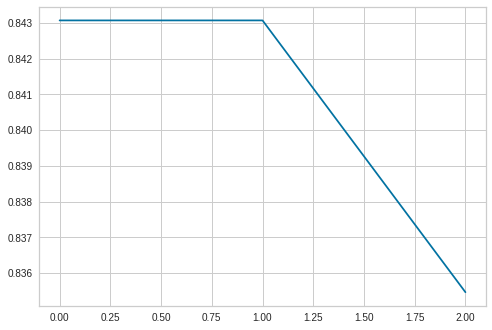



F1-Score (Micro)



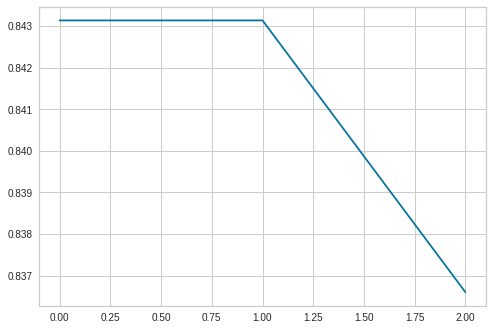



F1-Score (Macro)



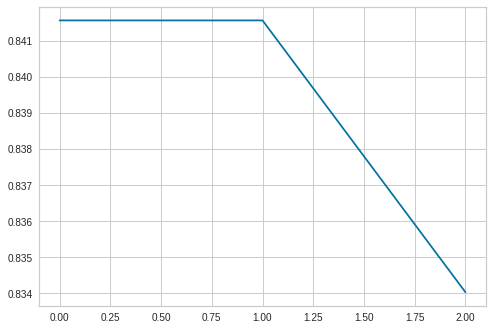



F1-Score (Weighted)



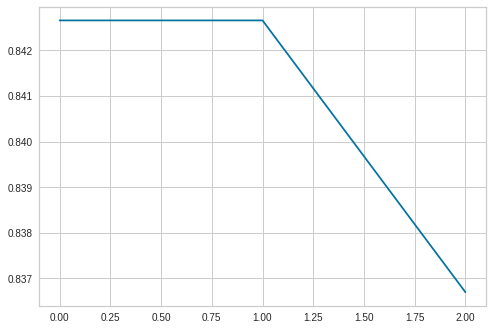



Precision (Micro)



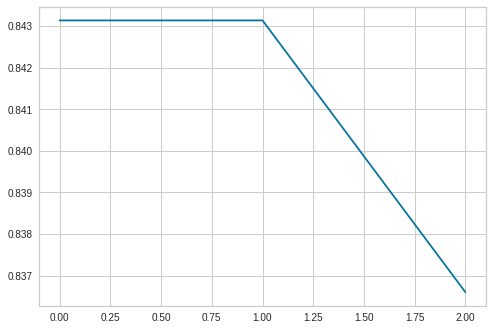



Precision (Macro)



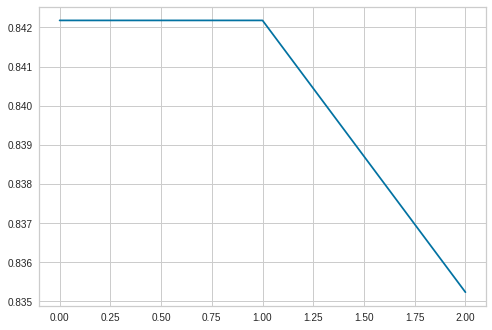



Precision (Weighted)



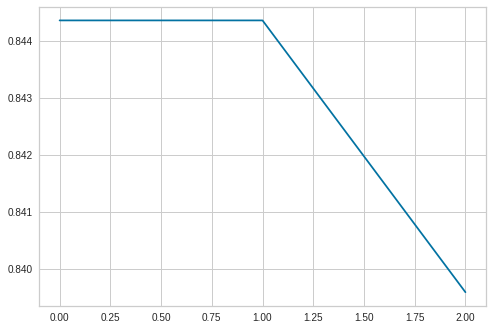



Recall (Micro)



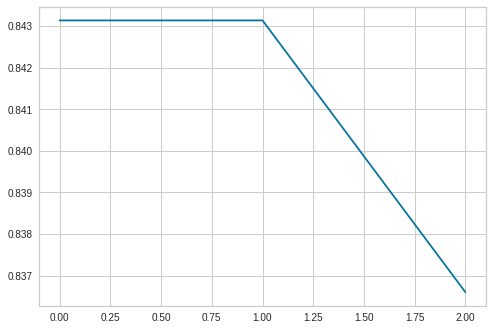



Recall (Macro)



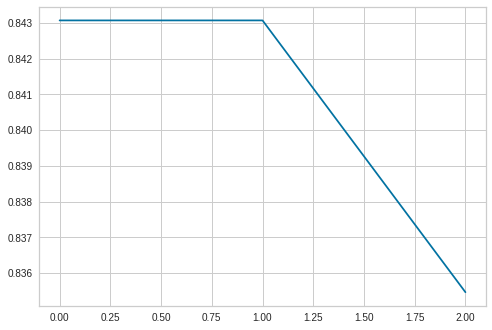



Recall (Weighted)



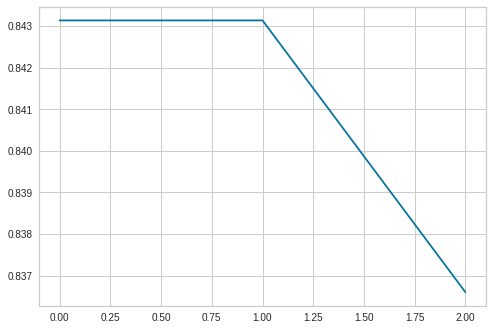

In [ ]:
# Plot all the measures
n_methods = 4 # Change this to 4. 

print("\n\nAccuracy\n")
plt.plot(range(n_methods), accs)
plt.show()

print("\n\nBalenced Accuracy\n")
plt.plot(range(n_methods), bal_accs)
plt.show()

print("\n\nF1-Score (Micro)\n")
plt.plot(range(n_methods), f1_micros)
plt.show()

print("\n\nF1-Score (Macro)\n")
plt.plot(range(n_methods), f1_macros)
plt.show()

print("\n\nF1-Score (Weighted)\n")
plt.plot(range(n_methods), f1_weighteds)
plt.show()

print("\n\nPrecision (Micro)\n")
plt.plot(range(n_methods), precs_micro)
plt.show()

print("\n\nPrecision (Macro)\n")
plt.plot(range(n_methods), precs_macro)
plt.show()

print("\n\nPrecision (Weighted)\n")
plt.plot(range(n_methods), precs_weighted)
plt.show()

print("\n\nRecall (Micro)\n")
plt.plot(range(n_methods), recs_micro)
plt.show()

print("\n\nRecall (Macro)\n")
plt.plot(range(n_methods), recs_macro)
plt.show()

print("\n\nRecall (Weighted)\n")
plt.plot(range(n_methods), recs_weighted)
plt.show()
